# House Prices 

Desafio Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline

## 1. Compreendendo o problema


In [3]:
df_train = pd.read_csv('./data/train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Compreendendo as variáveis

**Variável**: nome da variável

**Tipo**: identificação do tipo da variável: numérica ou categórica.

**Segmento**: identificação do segmento da variável (imóvel, espaço e localização)

**Expectativa**: a expectativa de influência da variável no preço de venda. Categorica: alta, média, baixa

**Conclusão**: conclusão sobre a importância da variável: alta, média, baixa (correção da expectativa após avaliação dos dados)

**Comentários**: qualquer observação sobre a variável

**Variável** | **Tipo** | **Segmento** | **Expectativa** | **Conclusão** | **Comentários**
-------------|----------|--------------|-----------------|---------------|----------------
MSZoning     | Categórica | Localização | Média | |
LotFrontage  | Numérica | Espaço | Baixa | |
LotArea      | Numérica | Espaço | Média  | |
Street       | Categórica | Espaço | Baixa | |
Alley        | Categórica | Espaço | Baixa | |
LotShape     | Categórica | Espaço | Baixa | |
LandContour  | Categórica | Espaço | Baixa | |
Utilities    | Categórica | Espaço | Média | |
LotConfig    | Categórica | Espaço | Baixa | |
LandSlope    | Categórica | Espaço | Baixa | |
Neighboorhood| Categórica | Localização | Média/Alta | |
HouseStyle   | Categórica | Imóvel | Baixa | |
OverallQual  | Categórica | Imóvel | Alta | |
OverallCond  | Categórica | Imóvel | Alta | |
YearBuilt    | Numérica | Imóvel | Alta | |
RoofStyle    | Categórica | Imóvel | Baixa | |
RoofMatl     | Categórica | Imóvel | Média | |
Exterior1st  | Categórica | Imóvel | Média | |
ExterQual    | Categórica | Imóvel | Média/Alta | |
ExterCond    | Categórica | Imóvel | Média/Alta | |
Foundation   | Categórica | Imóvel | Média/Alta | |
BsmtQual     | Categórica | Imóvel | Baixa | |
BsmtCond     | Categórica | Imóvel | Baixa | |
TotalBsmtSF  | Numérica   | Espaço | Média/Alta  | |
Heating      | Categórica | Imóvel | Baixa/Média | |
HeatingQC    | Categórica | Imóvel | Baixa/Média | |
CentralAir   | Categórica | Imóvel | Baixa | |
Electrical   | Categórica | Imóvel | Baixa | |
LowQualFinSF | Numérica | Espaço | Alta | |
GrLivArea    | Numérica | Espaço | Alta  | |
Bedroom      | Numérica | Imóvel | Baixa  | |
Kitchen      | Numérica | Imóvel | Baixa  | |
KitchenQual  | Categórica | Imóvel | Média/Alta  | |
TotRmsAbvGrd | Numérica | Imóvel | Média/Alta  | |
Functional   | Categórica | Imóvel | Baixa  | |
Fireplaces   | Numérica | Imóvel | Baixa  | |
GarageType   | Categórica | Imóvel | Média/Alta  | |
GarageCars   | Numérica | Imóvel | Média  | |
GarageArea   | Numérica | Espaço | Média  | |
GarageQual   | Numérica | Imóvel | Média  | |
PoolArea     | Numérica | Imóvel | Média  | |
YrSold       | Numérica | Imóvel | Média/Alta  | |
SaleType     | Numérica | Imóvel | Baixa  | |
SaleCondition| Numérica | Imóvel | Baixa  | |

## Conhecendo os dados

In [4]:
!pip install -U pandas-profiling

  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107421 sha256=15cf5ca01a17390fec29cf6397193e0a69c5b03e49be03275f9fd96c9b8beb1a
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\40\98\a3\b654f24edcdcdb87d1f70d65a506fcfdf15289db129c594bcd
Successfully built phik
  Attempting uninstall: visions
    Found existing installation: visions 0.6.0
    Uninstalling visions-0.6.0:
      Successfully uninstalled visions-0.6.0
  Attempting uninstall: phik
    Found existing installation: phik 0.10.0
    Uninstalling phik-0.10.0:
      Successfully uninstalled phik-0.10.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.11.0
    Uninstalling pandas-profiling-2.11.0:
      Successfully uninstalled pandas-profiling-2.11.0


ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


In [2]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_train, title='Profiling Diabets',html={'style':{'full_width':True}})

In [3]:
#profile.to_notebook_iframe()

## Qual o objetivo?
Vamos entender um pouco sobre a variável SalesPrice que é o centro das atenções desses dados. 

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


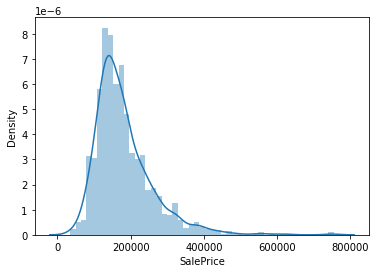

In [8]:
#histogram
sns.distplot(df_train['SalePrice']);

Olhando o histograma vemos que:
1. Desvia da distribuição normal
2. Têm assimetria positiva 
3. Podemos identificar um pico


In [9]:
#skewness and kurtosis
print("Assimetria positiva: %f" % df_train['SalePrice'].skew())
print("Curtose(a nitidez do pico de uma curva de distribuição de frequência): %f" % df_train['SalePrice'].kurt())

Assimetria positiva: 1.882876
Curtose(a nitidez do pico de uma curva de distribuição de frequência): 6.536282


**Relação com variáveis numéricas**

Sale price e GrLivArea - notamos uma relação linear entre as duas variáveis

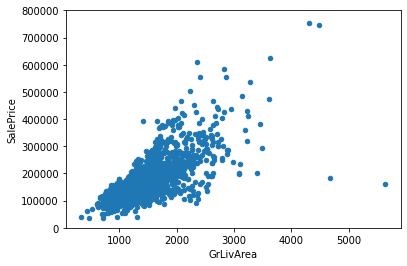

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
# Basic correlogram
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(include=numerics)

newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Sales price e variáveis categóricas

Overallqual e Sale Price: o box plot mostra como o sales prices crescem com o overall quality

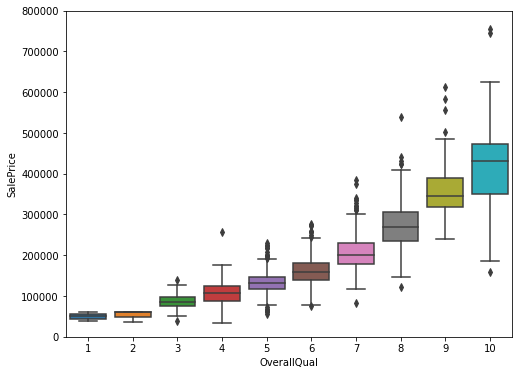

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

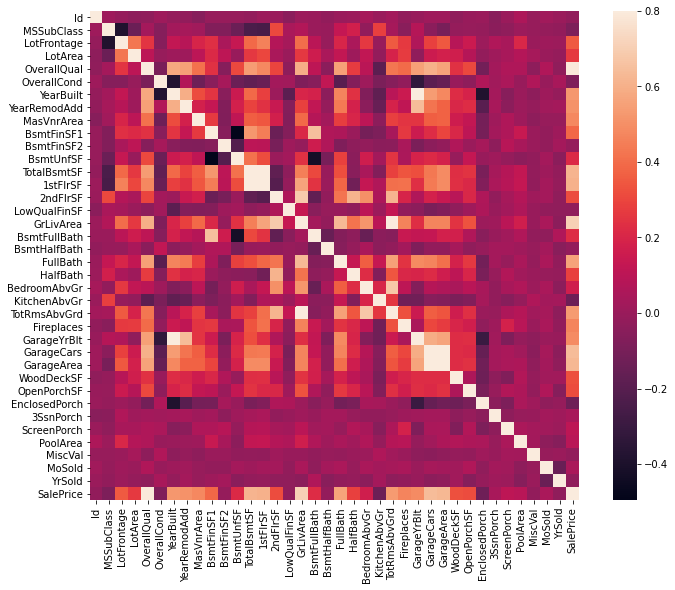

In [13]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Dois pontos de muita Correlação: Os grandes quadrados brancos na diagonal. Entre TotalBsmtSF e 1rtFlrSF. Entre GarageCars e GarageArea (as variáveis Garage...). 
Essa alta correlação pode indicar a situação de multicolinearidade (praticamente mesma informações nessas variáveis)

**SalePrice correlações**: muita correlação com OverallQual, GrLivArea, GarageArea/GarageCars, TotalBsmtSF/1rtFlrSF, FullBath, YearBuilt, TotRmsAbvGrd

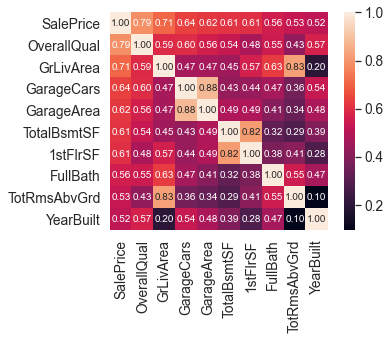

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Anotações sobre esse heatmap:
- OverallQual, GrLivArea e TotalBsmtSF são muito relacionados com SalePrice - como tinha visto
- 'GarageCars' and 'GarageArea'também são. Mas como são variáveis muito parecidas entre elas, podemos escolher apenas uma delas. Vou escolher GarageCars que tem um pouco mais de relação (0.64)
- O mesmo para TotalBsmtSF. Vamos manter apenas ele (muito parecido com 1stFloor)
- FullBath
- TotRmsAbvGrd e GrLivArea são também muito relacionados!!! Não precisamos manter os dois
- YearBuilt também tem relação com SalePrice, mas não é um valor alto. Para essa variável podemos realizar uma análise de time-series para avaliar essa relação

#### Scatter plot between 'SalePrice' and correlated variables

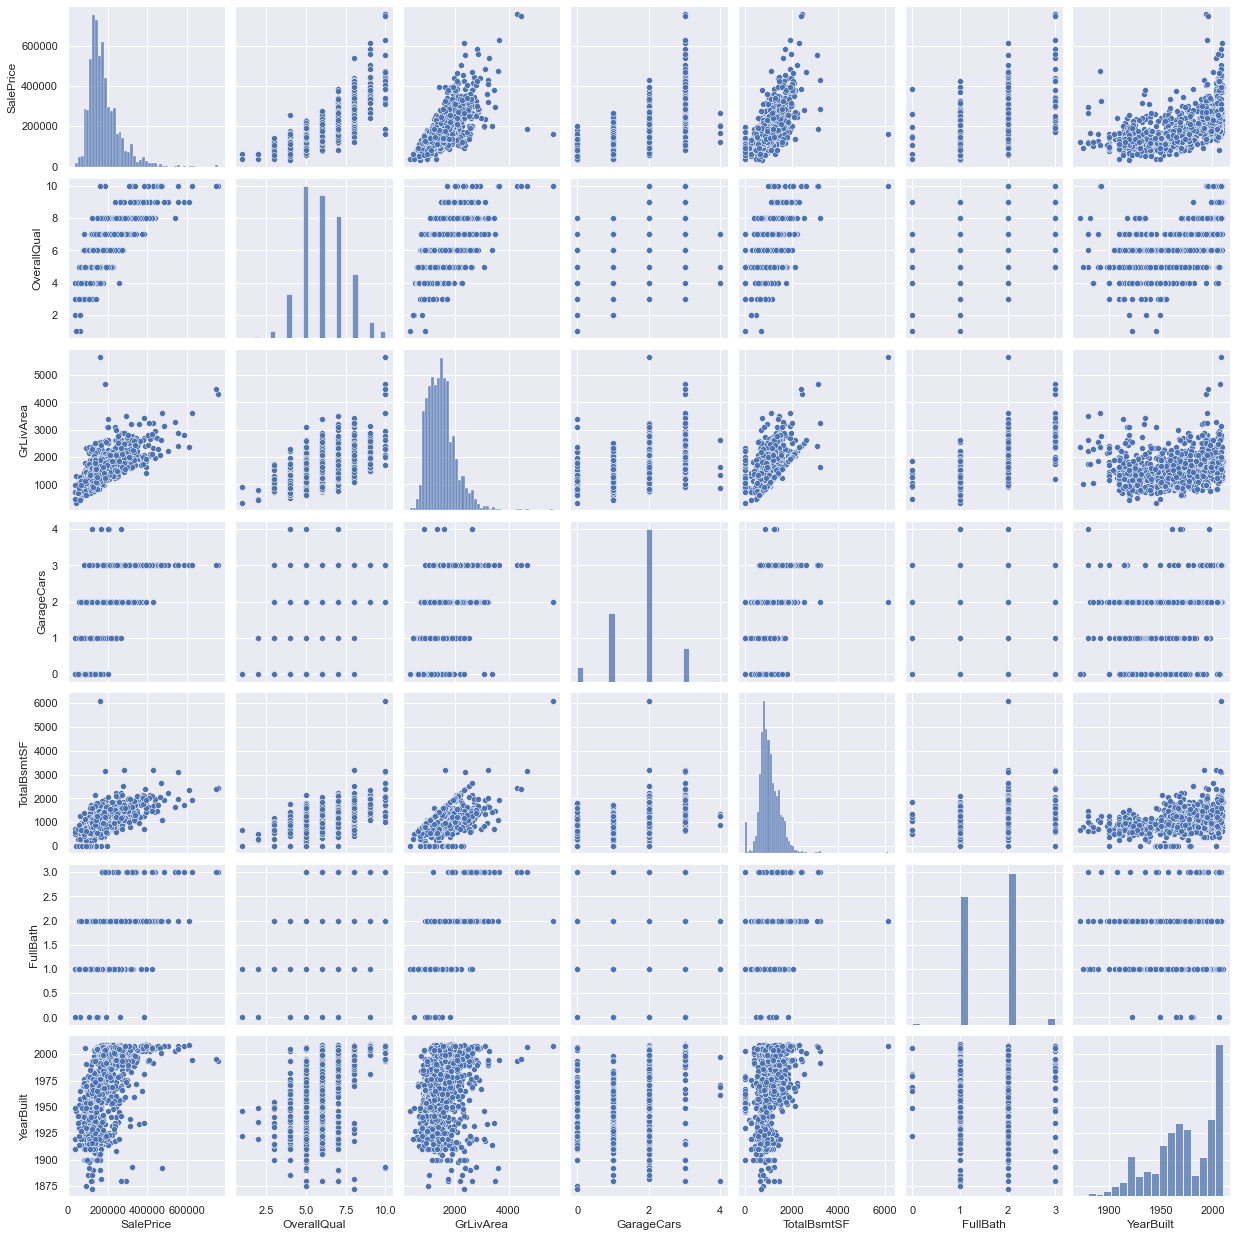

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

### Missing data

O que perguntar para dados faltantes:
- Quão prevalentes são os dados faltantes? 
- Os dados faltantes são aleatórios ou tem um padrão? 

Dados faltantes podem implicar a redução do tamanho da amostra. Preciso garantir que os dados faltantes não são enviesados e escondem alguma verdade incoveniente.

Vou verificar na mão. Poderia também olhar através do Pandas Profiling.

In [16]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Vou definir uma métrica de que acima de 15% de dados faltantes vou remover o atributo do dataframe (poderia também modificar de modo a preencher esses campos, mas acredito que nesse caso não é necessário).

Dessa forma, poderíamos deletar os primeiros atributos. Também acredito que não farão tanta diferença visto que não são atributos importantes quando avaliamos as variáveis relacionadas com o SalesPrice.

Note que todas as **GarageX** tem o mesmo número de dados faltantes e podemos remover essas variáveis, isso acontece pois no nosso caso a variável mais importante é a GarageCars. O mesmo vale para as variáveis **BsmtX**.

Podemos pensar em uma lógica parecida para MasVnrArea e Type, podemos remover ambos atributos sem perda significativa de informação (já são relacionadas com outras variáveis importantes que estamos considerando).

Em Electrical que só tem uma variável faltante podemos remover só essa observação e mander o atributo.

In [17]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) #unico atributo que mantemos. Removemos a obs
df_train.isnull().sum().max() #conferindo que não tem mais dados faltantes 

0

### Outliers

Outliers podem afetar gravemente os modelos e podem ser fontes valiosas de informação, garantindo alguns insights sobre comportamentos específicos dos dados.

#### Univariate analysis
Definir uma margem que define uma observação como um outlier. Normalizar os dados (converter todos os dados para todos com média 0 e desvio padrão 1)

In [18]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


#### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


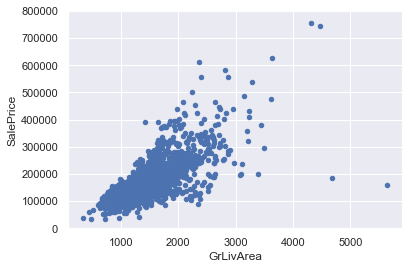

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Parte final

Queremos definir o SalesPrice. O que é?

A resposta a essa pergunta está em testar as premissas subjacentes às bases estatísticas da análise multivariada. Já fizemos alguma limpeza de dados e descobrimos muito sobre 'SalePrice'. Agora é hora de ir fundo e entender como 'SalePrice' está em conformidade com as suposições estatísticas que nos permitem aplicar técnicas multivariadas.

De acordo com Hair et al. (2013), quatro premissas devem ser testadas:

Normalidade - Quando falamos em normalidade, o que queremos dizer é que os dados devem ser semelhantes a uma distribuição normal. Isso é importante porque vários testes estatísticos dependem disso (por exemplo, estatísticas t). Neste exercício, vamos apenas verificar a normalidade univariada para 'SalePrice' (que é uma abordagem limitada). Lembre-se de que a normalidade univariada não garante a normalidade multivariada (que é o que gostaríamos de ter), mas ajuda. Outro detalhe a levar em consideração é que em grandes amostras (> 200 observações) a normalidade não é um problema. No entanto, se resolvermos a normalidade, evitaremos muitos outros problemas (por exemplo, heterocedacidade), então essa é a principal razão pela qual estamos fazendo esta análise.

Homocedasticidade - só espero ter escrito certo. Homocedasticidade refere-se à 'suposição de que a (s) variável (is) dependente (s) exibem níveis iguais de variância em toda a gama de variável (s) preditora (s)' (Hair et al., 2013). A homocedasticidade é desejável porque queremos que o termo de erro seja o mesmo em todos os valores das variáveis ​​independentes.

Linearidade- A maneira mais comum de avaliar a linearidade é examinar gráficos de dispersão e procurar padrões lineares. Se os padrões não forem lineares, valeria a pena explorar as transformações de dados. No entanto, não entraremos nisso porque a maioria dos gráficos de dispersão que vimos parecem ter relações lineares.

Ausência de erros correlacionados - Erros correlacionados, como sugere a definição, acontecem quando um erro é correlacionado a outro. Por exemplo, se um erro positivo comete um erro negativo sistematicamente, significa que há uma relação entre essas variáveis. Isso ocorre frequentemente em séries temporais, onde alguns padrões estão relacionados ao tempo. Também não entraremos nisso. No entanto, se você detectar algo, tente adicionar uma variável que possa explicar o efeito que você está obtendo. Essa é a solução mais comum para erros correlacionados.

### Normalidade
O objetivo aqui é testar 'SalePrice' de uma forma muito enxuta. Faremos isso prestando atenção a:

Histograma - curtose e assimetria.

Gráfico de probabilidade normal - a distribuição de dados deve seguir de perto a diagonal que representa a distribuição normal.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


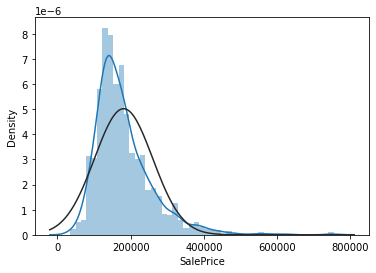

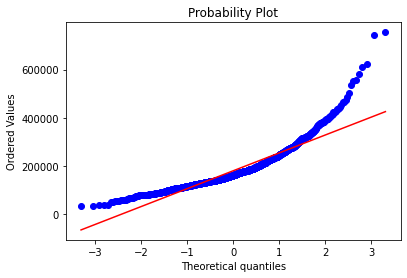

In [4]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [5]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


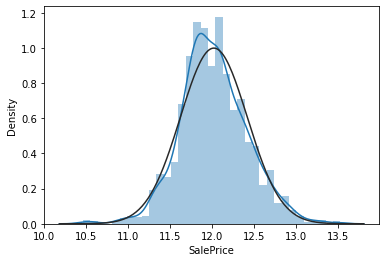

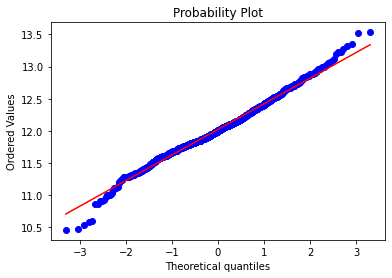

In [6]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


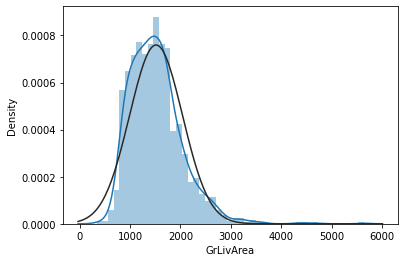

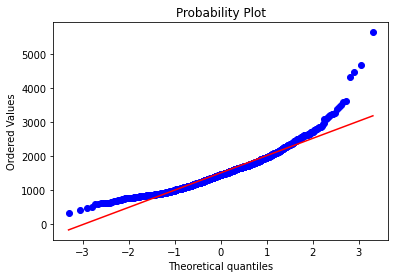

In [7]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [8]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


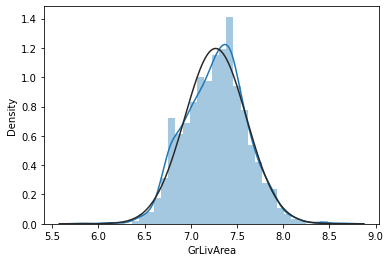

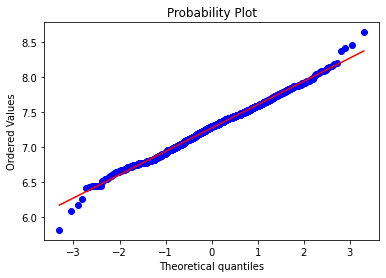

In [9]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


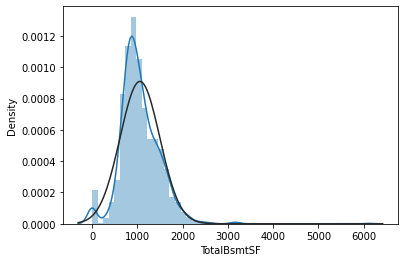

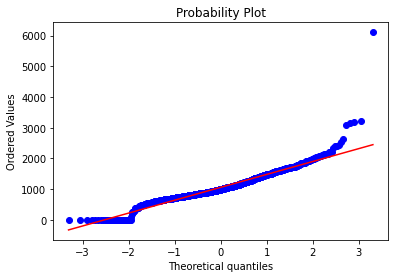

In [10]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

### Homoscedaticidade


A melhor abordagem para testar a homocedasticidade para duas variáveis métricas é graficamente. Os desvios de uma dispersão igual são mostrados por formas como cones (pequena dispersão em um lado do gráfico, grande dispersão no lado oposto) ou diamantes (um grande número de pontos no centro da distribuição).

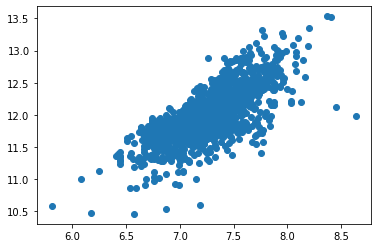

In [12]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);


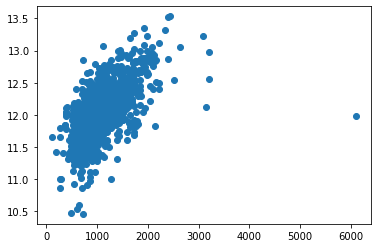

In [13]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

Podemos dizer que, em geral, 'SalePrice' exibe níveis iguais de variação em toda a faixa de 'TotalBsmtSF'.

In [14]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)